In [84]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    
    return(y)

# BackpropXOR

In [109]:
def BackpropXOR(w1,w2,x,d):
    alpha = 0.9
    n = 4

    for i in range(n):
        alpha = 0.9

        # 입력 데이터
        x_k = x[i]

        # 정답
        ans = d[i]

        # 입력층 계산값
        v1 = np.dot(w1, x_k)
        y1 = sigmoid(v1)


        v = np.dot(w2,y1)
        y = sigmoid(v)


        # 오차
        e = ans - y
        delta = y * (1-y) * e

        e1 = np.dot(w2.T, delta)
        delta1 = y1 * (1-y1) * e1

        dw1 = alpha * np.dot(np.array([delta1]).T, np.array([x_k]))
        w1 = w1 + dw1

        dw2 = alpha * np.dot(np.array([delta]), np.array([y1]))
        w2 = w2 + dw2

   
    return(e, w1, w2)

In [146]:
# Input
x = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])

# correct answer
d = [0,1,1,0]

# Weight
w1 = 2 * np.random.rand(4, 3) - 1
w2 = 2 * np.random.rand(1, 4) - 1

for epoch in range(10000):
    w1, w2 = BackpropXOR(w1,w2,x,d)
    
predict = np.array([])

n = 4
for i in range(n):
    v1 = np.dot(w1,x[i])
    y1 = sigmoid(v1)
    v = np.dot(w2,y1)
    y = sigmoid(v)
    predict = np.append(predict,y)
    

print(predict)

[0.01015535 0.98977815 0.98985183 0.00896261]


# Momemtum

In [6]:
def BackpropMmt(W1, W2, X, D):
    alpha = 0.9
    beta = 0.9
    mmt1 = np.zeros_like(W1)
    mmt2 = np.zeros_like(W2)
    n = 4

    for k in range(n):
        # 입력값
        x = X[k, :].reshape(-1, 1)
        d = D[k]
        
        # 예측값
        v1 = np.dot(W1, x)
        y1 = sigmoid(v1)
        v = np.dot(W2, y1)
        y = sigmoid(v)
        
        # 역전파 과정
        e = d - y
        delta = y * (1 - y) * e
        e1 = np.dot(W2.T, delta)
        delta1 = y1 * (1 - y1) * e1
        dW1 = alpha * np.dot(delta1, x.T)
        
        # 가중치 수정
        mmt1 = dW1 + beta * mmt1
        W1 = W1 + mmt1
        dW2 = alpha * np.dot(delta, y1.T)
        mmt2 = dW2 + beta * mmt2
        W2 = W2 + mmt2

    return W1, W2

In [7]:
# Input
x = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])

# correct answer
d = [0,1,1,0]

# Weight
w1 = 2 * np.random.rand(4, 3) - 1
w2 = 2 * np.random.rand(1, 4) - 1


for epoch in range(10000):
    w1, w2 = BackpropMmt(w1,w2,x,d)
    
predict = np.array([])

n = 4
for i in range(n):
    v1 = np.dot(w1,x[i])
    y1 = sigmoid(v1)
    v = np.dot(w2,y1)
    y = sigmoid(v)
    predict = np.append(predict,y)
    

print(predict)

[0.0037602  0.99531259 0.99382625 0.01181961]


# BackpropCE

In [95]:
def BackpropCE(W1, W2, X, D):
    alpha = 0.9
    N = 4

    for k in range(N):
        
        # 입력값
        x = X[k, :].reshape(-1, 1)
        d = D[k]
        
        # 예측값
        v1 = np.dot(W1, x)
        y1 = sigmoid(v1)
        v = np.dot(W2, y1)
        y = sigmoid(v)
        
        # 역전파 
        e = d - y
        delta = e
        e1 = np.dot(W2.T, delta)
        delta1 = y1 * (1 - y1) * e1
        dW1 = alpha * np.dot(delta1, x.T)
        W1 = W1 + dW1
        dW2 = alpha * np.dot(delta, y1.T)
        W2 = W2 + dW2

    return W1, W2

In [96]:
# Input
x = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])

# correct answer
d = [0,1,1,0]

# Weight
w1 = 2 * np.random.rand(4, 3) - 1
w2 = 2 * np.random.rand(1, 4) - 1


for epoch in range(10000):
    w1, w2 = BackpropCE(w1,w2,x,d)
    
predict = np.array([])

n = 4
for i in range(n):
    v1 = np.dot(w1,x[i])
    y1 = sigmoid(v1)
    v = np.dot(w2,y1)
    y = sigmoid(v)
    predict = np.append(predict,y)
    

print(predict)

[1.85632755e-04 9.99723424e-01 9.99893624e-01 3.17921342e-04]


# Compare of Cost function

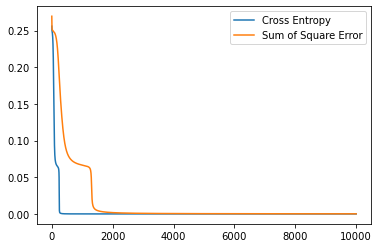

In [145]:
# Input
x = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])

# correct answer
d = [0,1,1,0]

# Weight
w11 = 2 * np.random.rand(4, 3) - 1
w12 = 2 * np.random.rand(1, 4) - 1
w21 = w11.copy()
w22 = w12.copy()


E1 = np.zeros(10000)
E2 = np.zeros(10000)

# Weight

for epoch in range(10000):
    w11, w12 = BackpropCE(w11,w12,x,d)
    w21, w22 = BackpropXOR(w21,w22,x,d)
    
    
    es1 = 0
    es2 = 0
    n = 4
    
    for i in range(n):
        x_i = x[i, :].reshape(-1,1)
        d_i = d[i]
        
        v1 = np.dot(w11,x_i)
        y1 = sigmoid(v1)
        v = np.dot(w12, y1)
        y = sigmoid(v)
        es1 = es1 + (d_i - y) * (d_i - y)
        
        vv1 = np.dot(w21,x_i)
        yy1 = sigmoid(vv1)
        vv = np.dot(w22, yy1)
        yy = sigmoid(vv)
        es2 = es2 + (d_i - yy) * (d_i - yy)
    
    E1[epoch] = es1 / n
    E2[epoch] = es2 / n

    
plt.plot(range(10000), E1, range(10000), E2)
plt.legend(['Cross Entropy', 'Sum of Square Error'])
plt.show()